# 4329 Session 1

Univariate time series modeling
* AR processes
* MA processes
* ARMA processes
* Forecasting

Long-run relationships in finance and multivariate time series
* Stationarity and Unit-Root Testing
* Structural breaks
* Seasonality effects
* VAR and VARMA models

Unless stated, using built in R functions 

#### Simulate some data

In [1]:
set.seed(123) # Will give you the same results as in these examples
N = 100
epsilon = rnorm(n = N)
y = vector(length = N)
y[1] = 5
for (i in 2:N) {
    y[i] = 2 +  0.6 * y[i-1] + 0.2 * epsilon[i-1] + epsilon[i]
}

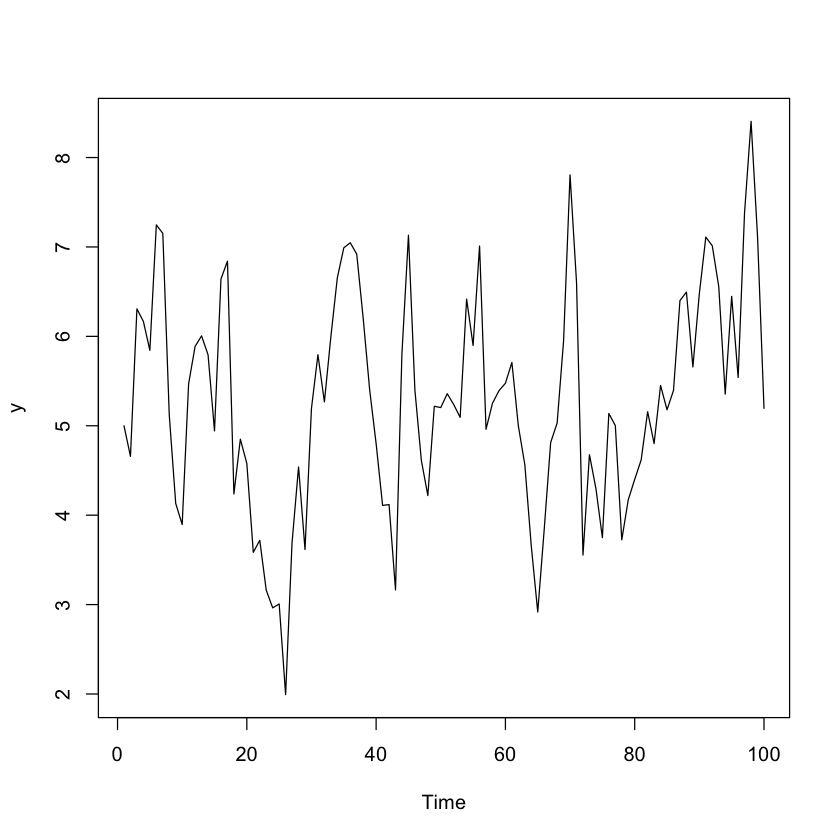

In [2]:
plot.ts(y)

(The mean should be $2 / (1 - 0.6) = 5$)

In [3]:
mean(y)

[1] 5.287441

#### Autocorrelogram (`acf`, `pacf`)

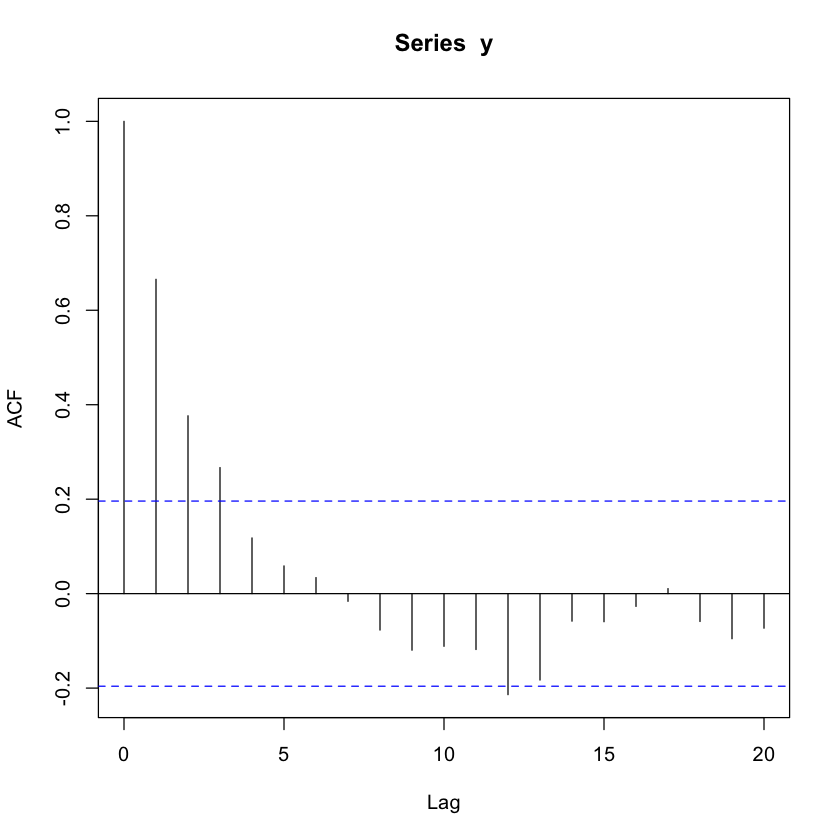

In [4]:
acf(y)

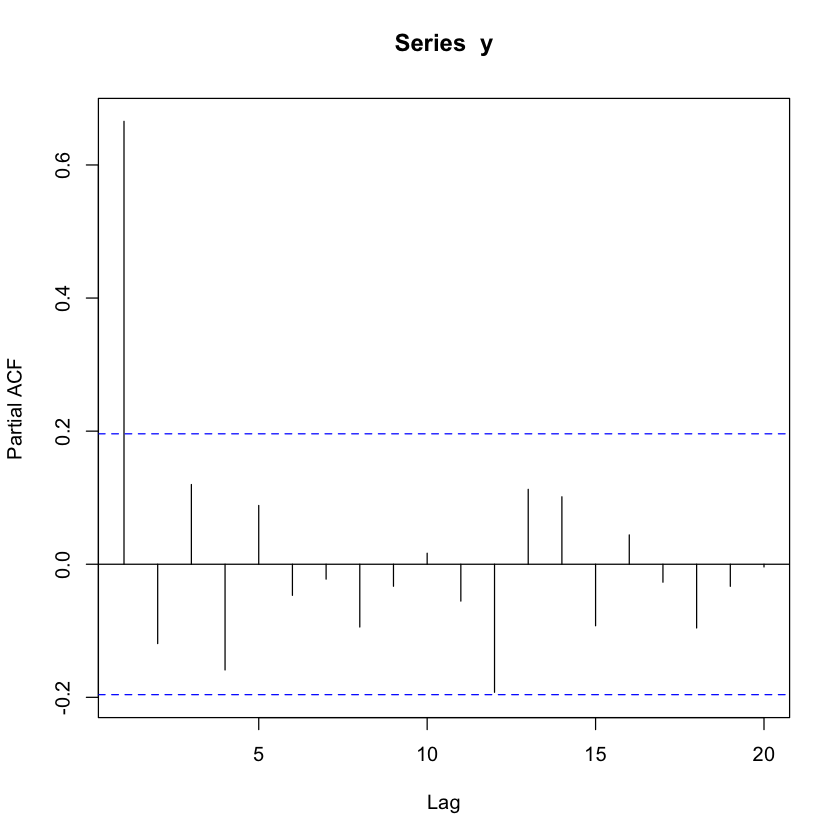

In [5]:
pacf(y)

# Ljung-Box test (`Box.test`)

In [6]:
Box.test(y, lag = 5, type = 'Ljung-Box')


	Box-Ljung test

data:  y
X-squared = 69.739, df = 5, p-value = 1.161e-13


The null hypothesis was the the series is white noise, that is rejected here (p-value $\approx$ 0)

# Estimating AR processes: `arima` 

* argument: `order = ("AR lag", 0, 0)`

In [7]:
model1 = arima(y, order = c(1, 0, 0))
model1


Call:
arima(x = y, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.6595     5.2803
s.e.  0.0737     0.2639

sigma^2 estimated as 0.8387:  log likelihood = -133.38,  aic = 272.77

In [8]:
Box.test(residuals(model1), lag = 10, type = 'Ljung-Box', fitdf = 1)


	Box-Ljung test

data:  residuals(model1)
X-squared = 5.6269, df = 9, p-value = 0.7766


`fitdf` takes into account estimated parameters (degrees of freedom $=n\_lags-n\_parameters$)

# Estimating MA processes: `arima` 

* argument: `order = (0, 0, "MA lag")`

In [9]:
model2 = arima(y, order = c(0, 0, 1))
model2


Call:
arima(x = y, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.7193     5.2848
s.e.  0.0706     0.1599

sigma^2 estimated as 0.8723:  log likelihood = -135.43,  aic = 276.86

In [10]:
Box.test(residuals(model2), lag = 10, type = 'Ljung-Box', fitdf = 1)


	Box-Ljung test

data:  residuals(model2)
X-squared = 15.096, df = 9, p-value = 0.08833


# Estimating ARMA processes: `arima` 

* argument: `order = c(AR, MA)`

In [11]:
model3 = arima(y, order = c(1, 0, 1))
model3


Call:
arima(x = y, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.4618  0.3444     5.2812
s.e.  0.1666  0.2116     0.2232

sigma^2 estimated as 0.8163:  log likelihood = -132.07,  aic = 272.15

In [12]:
Box.test(residuals(model3), lag = 10, type = 'Ljung-Box', fitdf = 2)


	Box-Ljung test

data:  residuals(model3)
X-squared = 5.1065, df = 8, p-value = 0.7461


# Model selection of  ARMA processes: `auto.arima` (library `forecast`)

* The ARMA(p,q) model that minimizes the AIC

In [13]:
library(forecast)
model4 = auto.arima(y, max.p = 5, max.q = 5, d = 0, ic = 'aic')

Warning message:
“package ‘forecast’ was built under R version 3.4.2”

In [14]:
model4

Series: y 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
          ar1     ar2     ma1    mean
      -0.0223  0.3656  0.8347  5.2801
s.e.   0.1778  0.1535  0.1349  0.2440

sigma^2 estimated as 0.8191:  log likelihood=-130.29
AIC=270.59   AICc=271.23   BIC=283.62

In [15]:
Box.test(residuals(model4), lag = 10, type = 'Ljung-Box', fitdf = 3)


	Box-Ljung test

data:  residuals(model4)
X-squared = 1.5244, df = 7, p-value = 0.9815


* Using the BIC

In [16]:
auto.arima(y, max.p = 5, max.q = 5, d = 0, ic = 'bic')

Series: y 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.6595  5.2803
s.e.  0.0737  0.2639

sigma^2 estimated as 0.8558:  log likelihood=-133.38
AIC=272.77   AICc=273.02   BIC=280.58

##### (See what happens when `N` (in the $y$ simulation at the beginning) is increased ...)

# Forecast: `predict`

Refit the ARIMA(1,1) model to the first 80 observations

In [17]:
model5 = arima(y[1:90], order = c(1, 0, 1))

In [18]:
forecast = predict(model5, n.ahead=10)
forecast

$pred
Time Series:
Start = 91 
End = 100 
Frequency = 1 
 [1] 6.188435 5.521355 5.287340 5.205247 5.176449 5.166346 5.162802 5.161558
 [9] 5.161122 5.160969

$se
Time Series:
Start = 91 
End = 100 
Frequency = 1 
 [1] 0.8789123 1.1322484 1.1596065 1.1629288 1.1633370 1.1633872 1.1633934
 [8] 1.1633942 1.1633943 1.1633943


In a plot, with actual values, forecasts, and 2 standard deviations error bars

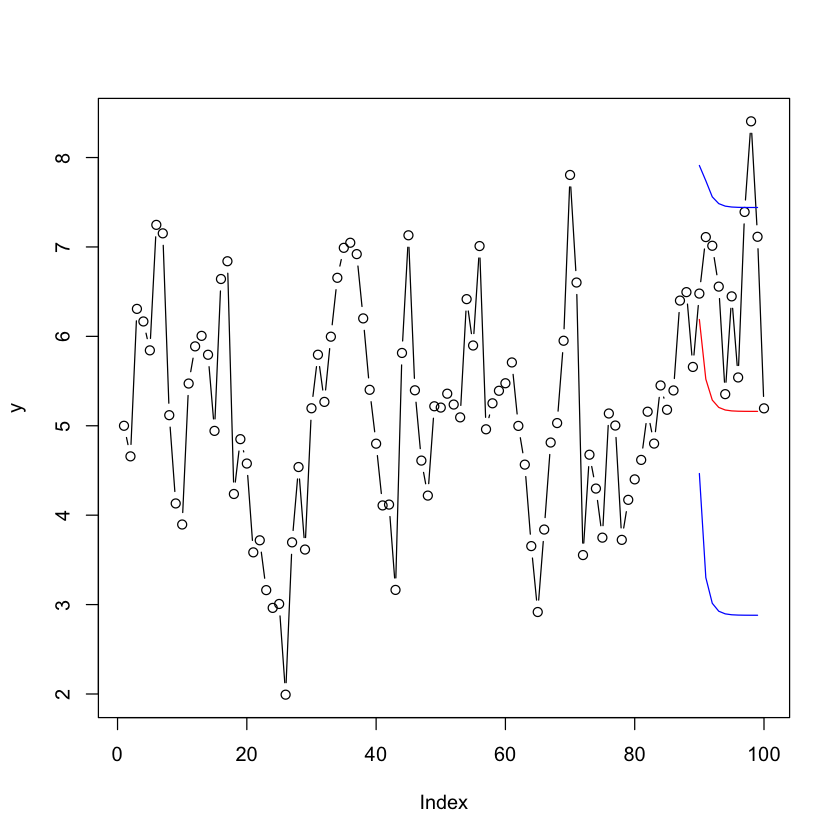

In [19]:
plot(y, type='b')
lines(seq(from = 90, by = 1, length = 10), forecast$pred, col='red') # The forecast
lines(seq(from = 90, by = 1, length = 10),
      forecast$pred + 1.96*forecast$se, col='blue')
lines(seq(from = 90, by = 1, length = 10),
      forecast$pred - 1.96*forecast$se, col='blue')

# Stationarity and unit root testing: `adf.test` (package `tseries`)

In [20]:
library(tseries)
adf.test(y)


	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -3.3619, Lag order = 4, p-value = 0.06483
alternative hypothesis: stationary


Barely significant

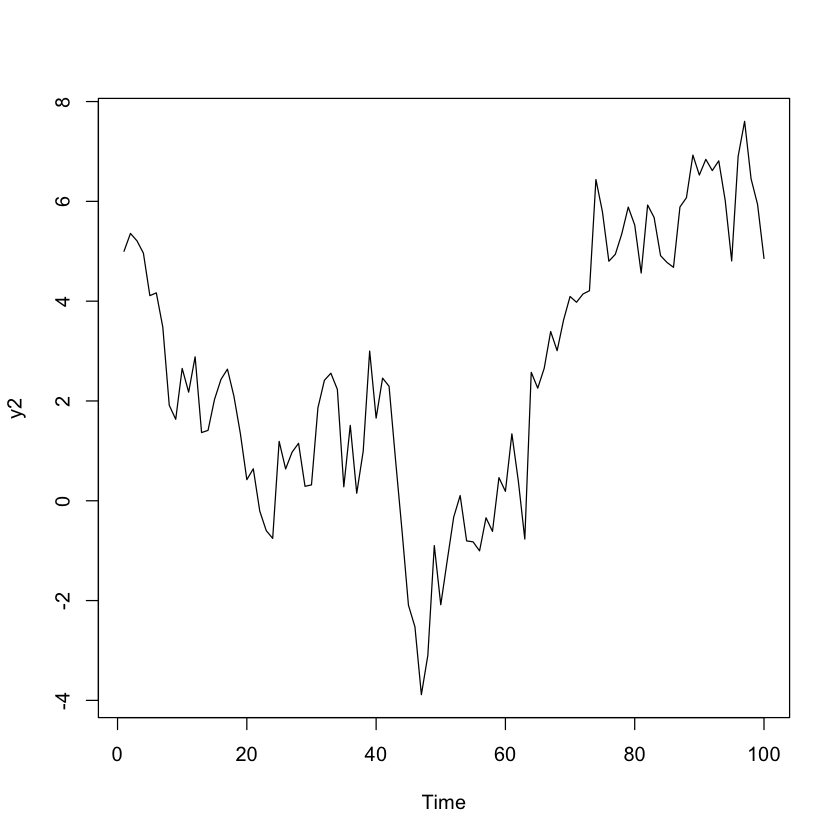

In [21]:
epsilon = rnorm(n = N)
y2 = vector(length = N)
y2[1] = 5
for (i in 2:N) {
    y2[i] = 0.1 +  y2[i-1] + epsilon[i]
}
plot.ts(y2)

In [22]:
adf.test(y2)


	Augmented Dickey-Fuller Test

data:  y2
Dickey-Fuller = -2.2898, Lag order = 4, p-value = 0.4566
alternative hypothesis: stationary


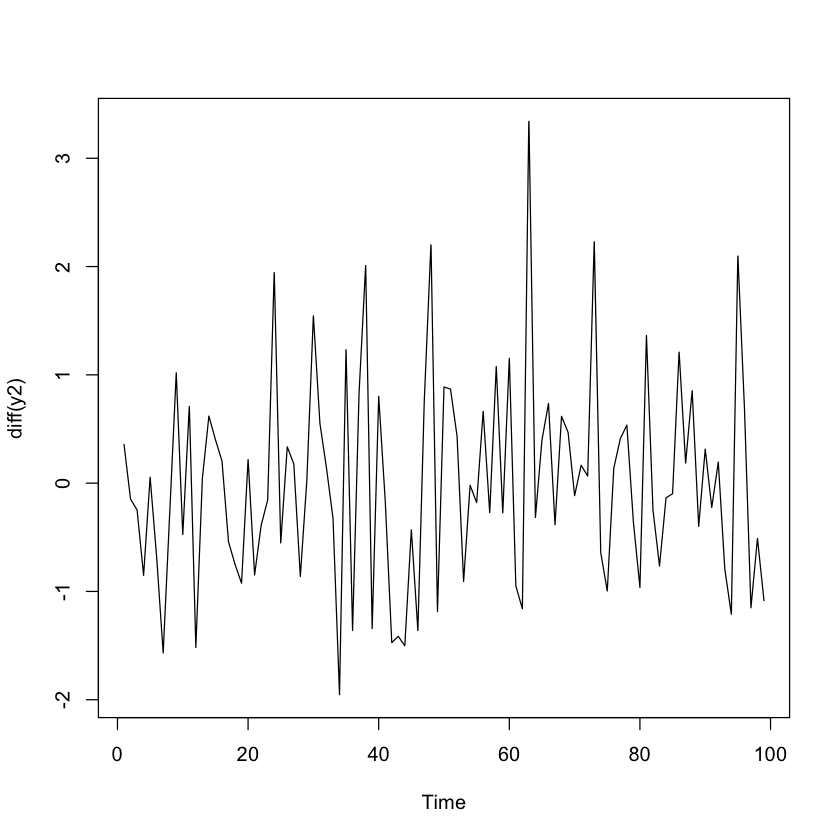

In [23]:
plot.ts(diff(y2))

In [24]:
adf.test(diff(y2))

Warning message in adf.test(diff(y2)):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  diff(y2)
Dickey-Fuller = -4.6802, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


# Structural breaks: `sctest` (package `strucchange` )

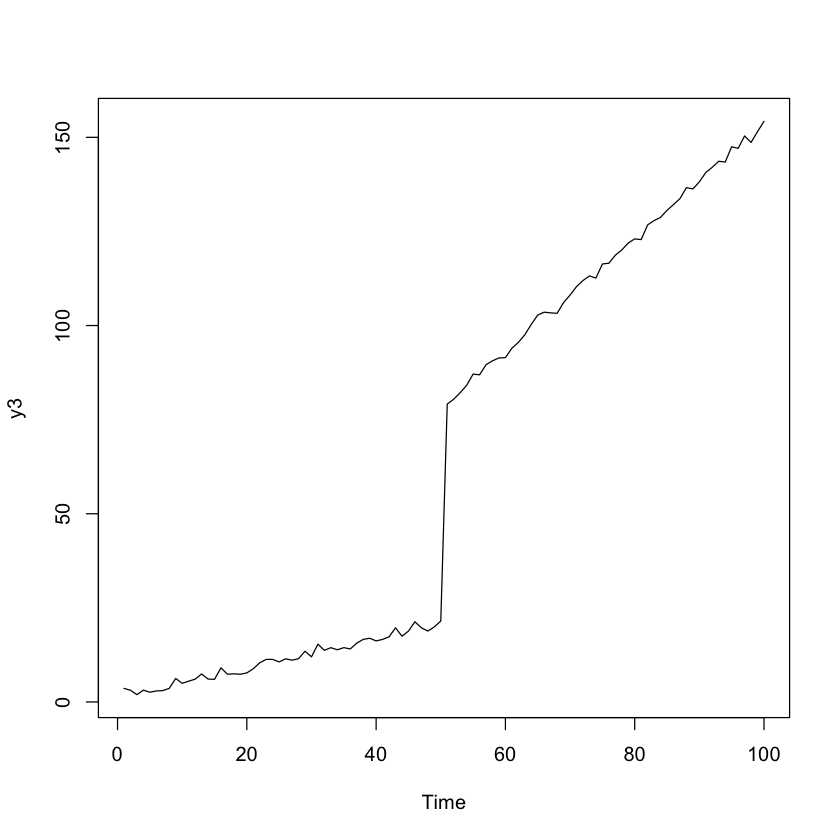

In [25]:
y3 = c(1 + 0.4 * 1:50, 3 + 1.5 * 51:100) + rnorm(n = 100)
plot.ts(y3)

In [26]:
library(strucchange)
sctest(y3 ~ 1 , type = "Chow", point = 51)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich



	Chow test

data:  y3 ~ 1
F = 941.95, p-value < 2.2e-16


Null: the two lines are zero (p-value = 0)

# VAR and VARMA models: (package `vars`)
--------------------------

In [27]:
library(vars)
data("Canada") # Macro data set for canada
head(Canada)

Loading required package: MASS
Loading required package: urca
Loading required package: lmtest


e,prod,rw,U
929.6105,405.3665,386.1361,7.53
929.8040,404.6398,388.1358,7.70
930.3184,403.8149,390.5401,7.47
931.4277,404.2158,393.9638,7.27
932.6620,405.0467,396.7647,7.37
933.5509,404.4167,400.0217,7.13


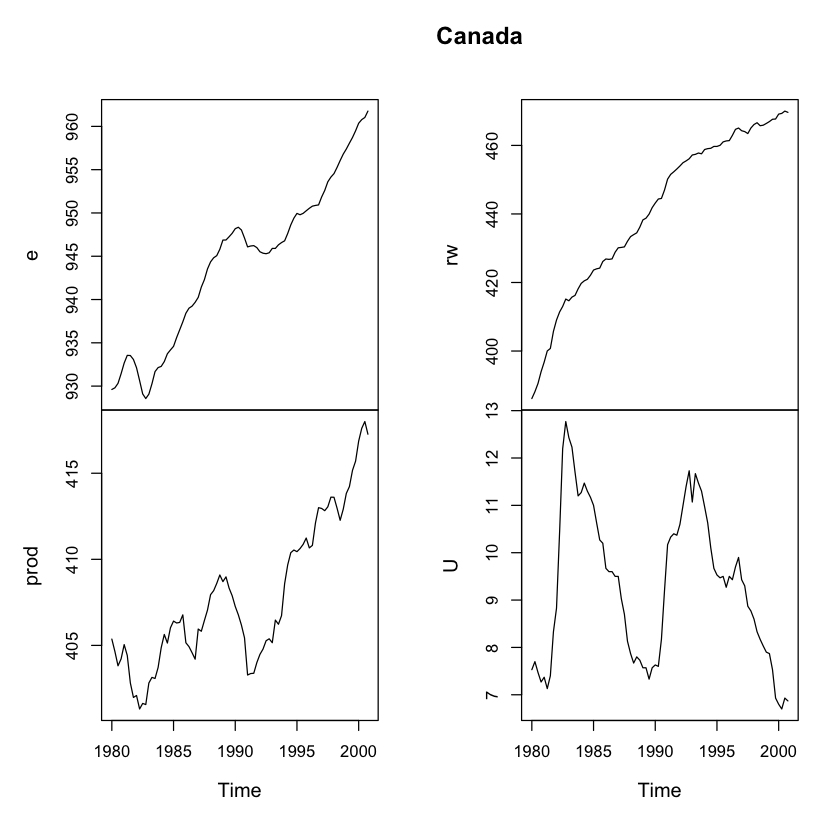

In [28]:
plot(Canada, nc = 2)

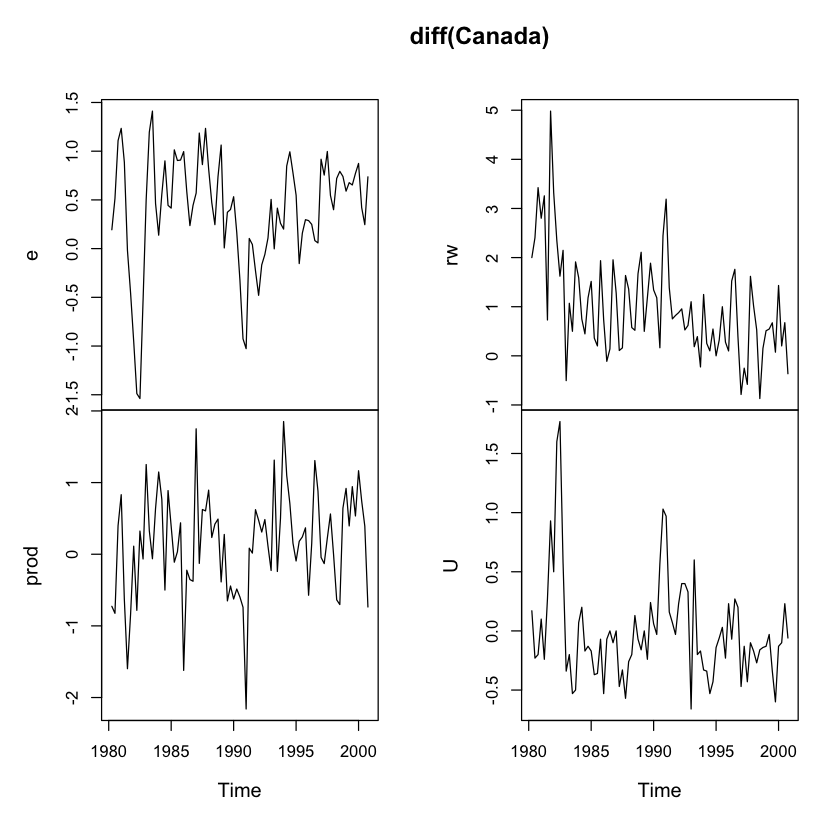

In [29]:
plot(diff(Canada), nc = 2)

# Select optimal VAR(p) according to AIC: `VARselect`

(only need this library if you want it to compute impulse responses / variance decompositions)

In [30]:
var1 = VARselect(diff(Canada))
var1

,1,2,3,4,5,6,7,8,9,10
AIC(n),-6.585305099,-6.524564584,-6.257398494,-6.266083930,-6.033302666,-5.789723168,-5.624974011,-5.638393655,-5.552029925,-5.448883485
HQ(n),-6.335226292,-6.074422732,-5.607193595,-5.415815985,-4.982971676,-4.539329132,-4.174516930,-3.987873527,-3.701446752,-3.398237266
SC(n),-5.957781965,-5.395022942,-4.625838344,-4.132505272,-3.397705501,-2.652107495,-1.985339831,-1.496740966,-0.908358729,-0.303193781
FPE(n),0.001381693,0.001474375,0.001945872,0.001966961,0.002563278,0.003432785,0.004339815,0.004716947,0.005863675,0.007749058


p = 1 optimal

# Fit VAR(p): `VAR`

In [31]:
var2 = VAR(diff(Canada), p = 1)
var2


VAR Estimation Results:

Estimated coefficients for equation e: 
Call:
e = e.l1 + prod.l1 + rw.l1 + U.l1 + const 

       e.l1     prod.l1       rw.l1        U.l1       const 
 0.74083297  0.18427931 -0.05207171  0.14031384  0.13181630 


Estimated coefficients for equation prod: 
Call:
prod = e.l1 + prod.l1 + rw.l1 + U.l1 + const 

       e.l1     prod.l1       rw.l1        U.l1       const 
-0.42334602  0.24426975 -0.02005895 -0.85238362  0.29282997 


Estimated coefficients for equation rw: 
Call:
rw = e.l1 + prod.l1 + rw.l1 + U.l1 + const 

      e.l1    prod.l1      rw.l1       U.l1      const 
 0.1439871 -0.3064895  0.3337161  0.4593971  0.6481169 


Estimated coefficients for equation U: 
Call:
U = e.l1 + prod.l1 + rw.l1 + U.l1 + const 

       e.l1     prod.l1       rw.l1        U.l1       const 
-0.50251316 -0.13648147  0.06514647 -0.12720924  0.13588226 



# Impulse response: `irf`

1 one unit shock to `e`'s impact on the remaining variables

In [32]:
irf(var2, impulse = "e", response = c("prod", "rw", "U"), boot = FALSE)


Impulse response coefficients
$e
             prod          rw           U
 [1,] 0.018619585 -0.11989386 -0.21642482
 [2,] 0.027200878 -0.08928503 -0.17776132
 [3,] 0.047050063 -0.08139441 -0.12093605
 [4,] 0.039033924 -0.07089194 -0.08794751
 [5,] 0.030466541 -0.05716282 -0.06458366
 [6,] 0.023171861 -0.04431991 -0.04770075
 [7,] 0.017428764 -0.03367719 -0.03533053
 [8,] 0.013034932 -0.02532408 -0.02620789
 [9,] 0.009719772 -0.01893816 -0.01945662
[10,] 0.007236220 -0.01412106 -0.01445086
[11,] 0.005382650 -0.01051269 -0.01073553


# Variance decomposition: `fevd`

Percent of the forecast error that is explained by a shock to $e$

In [33]:
fevd(var2)$e

e,prod,rw,U
1.0000000,0.00000000,0.000000000,0.000000000
0.9278169,0.06141545,0.006811381,0.003956290
0.8787277,0.10169760,0.014825865,0.004748806
0.8500294,0.12290050,0.021015624,0.006054509
0.8338511,0.13416714,0.024949594,0.007032174
0.8248503,0.14024035,0.027268922,0.007640447
0.8198660,0.14354697,0.028591238,0.007995836
0.8171110,0.14535807,0.029333236,0.008197694
0.8155894,0.14635348,0.029746335,0.008310788
0.8147492,0.14690168,0.029975410,0.008373712


# Using R's `ar` function (with data in `ts` format):

If the data had not already been in a time series format:

In [34]:
# Canada = as.ts(Canada)

Selecting columns from `ts` objects, use `[, 'column_name']`:

In [35]:
head(Canada[, 'e'])

         Qtr1     Qtr2     Qtr3     Qtr4
1980 929.6105 929.8040 930.3184 931.4277
1981 932.6620 933.5509                  

Same as the VAR fitted above 

In [36]:
var_ar = ar(diff(Canada), order.max = 1, method = 'ols')
var_ar


Call:
ar(x = diff(Canada), order.max = 1, method = "ols")

$ar
, , 1

           e    prod       rw       U
e     0.7408  0.1843 -0.05207  0.1403
prod -0.4233  0.2443 -0.02006 -0.8524
rw    0.1440 -0.3065  0.33372  0.4594
U    -0.5025 -0.1365  0.06515 -0.1272


$x.intercept
        e      prod        rw         U 
 0.004325  0.007063 -0.014084 -0.003855 

$var.pred
             e       prod         rw        U
e     0.141315  0.0067827 -0.0436746 -0.07884
prod  0.006783  0.4259724  0.0001869 -0.01623
rw   -0.043675  0.0001869  0.8105518  0.07139
U    -0.078839 -0.0162290  0.0713923  0.09220


You get the residuals with `residuals` as before*

In [37]:
head(residuals(var_ar))

e,prod,rw,U
NA,NA,NA,NA
0.4534325,-0.6733654,0.7602614,-0.4764772
0.9058892,0.3795218,1.7519709,-0.3758718
0.4131611,0.8080020,1.0652346,0.3277855
-0.1786160,-0.4618138,1.7052060,0.1880407
-0.4904168,-1.4994706,-1.2160573,0.2521260


Omit the first missing row with `na.omit` (one is missing because the VAR order is one)

In [38]:
head(na.omit(residuals(var_ar)))

e,prod,rw,U
0.4534325,-0.6733654,0.7602614,-0.4764772
0.9058892,0.3795218,1.7519709,-0.3758718
0.4131611,0.8080020,1.0652346,0.3277855
-0.1786160,-0.4618138,1.7052060,0.1880407
-0.4904168,-1.4994706,-1.2160573,0.2521260
-0.2775571,-0.5078107,3.4794200,0.5531206


Make a prediction from a `new` observation (that we just set equal to 0.8 times the mean)

In [39]:
new = var_ar$x.mean * 0.8
# Convert to a `ts` object
new_ts = ts(t(data.frame(new)), start = 2001, end = 2001)
# The `Canada` data set's last obervation was = 2000
new_ts

e,prod,rw,U
0.3099296,0.1147009,0.8049265,-0.006361446


In [40]:
predict(var_ar, new_ts, n.ahead = 1, se.fit = FALSE)

e,prod,rw,U
0.3397529,0.1789169,0.9232827,0.01773138


The `acf`, the plots on the off-diagonal are the cross correlations, the ones on the diagonal are the acf

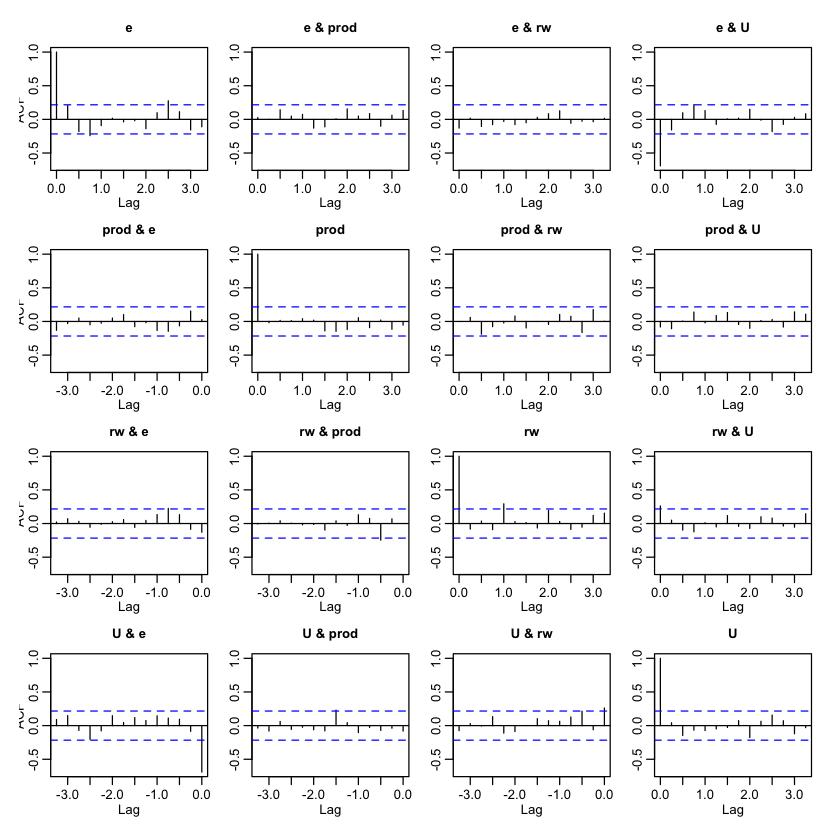

In [41]:
acf(na.omit(residuals(var_ar)))

The absolute values of the eigenvalues of $\boldsymbol \Phi$ (phi) (`eigen`)

In [42]:
phi = var_ar$ar[1, , ]
phi

,e,prod,rw,U
e,0.7408330,0.1842793,-0.05207171,0.1403138
prod,-0.4233460,0.2442698,-0.02005895,-0.8523836
rw,0.1439871,-0.3064895,0.33371613,0.4593971
U,-0.5025132,-0.1364815,0.06514647,-0.1272092


In [43]:
abs(eigen(phi)$values)

[1] 0.74310551 0.40100508 0.10945167 0.06195264

The covariance matrix of the residuals (`cov`)

In [44]:
cov(na.omit(residuals(var_ar)))

,e,prod,rw,U
e,0.143059172,0.0068664254,-0.0442137816,-0.07981192
prod,0.006866425,0.4312312831,0.0001892408,-0.01642931
rw,-0.044213782,0.0001892408,0.8205586472,0.07227370
U,-0.079811921,-0.0164293089,0.0722736974,0.09334055


*`residuals`, `predict`, `summary`, etc are "generic functions". `residuals` gives you residuals for an `lm`, `ar`, ..., object, where the concept of residuals make sense (residuals of a plot will naturally give you an error) (in external user written packages adherence to these practices varies _a lot_ ).